In [1]:
import sqlite3 as sq3
import pandas as pd

In [2]:
con = sq3.connect("/Users/yawenzhou/Documents/GitHub/homework-4-Yawen-Zhou/opioid.db")

In [3]:
sql = con.cursor()
population = pd.read_sql_query("SELECT * from population", con)
annual = pd.read_sql_query("SELECT * from annual", con)
land = pd.read_sql_query("SELECT * from land", con)
con.close

<function Connection.close()>

In [5]:
# Show the variables the dataframes have, similar to pragma table_info in sqlite
population.info

<bound method DataFrame.info of            ?   BUYER_COUNTY BUYER_STATE countyfips STATE COUNTY  \
0          1        AUTAUGA          AL      01001     1      1   
1          2        BALDWIN          AL      01003     1      3   
2          3        BARBOUR          AL      01005     1      5   
3          4           BIBB          AL      01007     1      7   
4          5         BLOUNT          AL      01009     1      9   
...      ...            ...         ...        ...   ...    ...   
28260  28261       WASHAKIE          WY      56043    56     43   
28261  28262         WESTON          WY      56045    56     45   
28262  28263        SKAGWAY          AK      02230     2    230   
28263  28264  HOONAH ANGOON          AK      02105     2    105   
28264  28265     PETERSBURG          AK      02195     2    195   

         county_name                               NAME    variable  year  \
0            Autauga            Autauga County, Alabama  B01003_001  2006   
1        

In [6]:
annual.info
annual.head(20)

,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
0,1,ABBEVILLE,SC,2006,877,363620,45001
1,2,ABBEVILLE,SC,2007,908,402940,45001
2,3,ABBEVILLE,SC,2008,871,424590,45001
3,4,ABBEVILLE,SC,2009,930,467230,45001
4,5,ABBEVILLE,SC,2010,1197,539280,45001
5,6,ABBEVILLE,SC,2011,1327,566560,45001
6,7,ABBEVILLE,SC,2012,1509,589010,45001
7,8,ABBEVILLE,SC,2013,1572,596420,45001
8,9,ABBEVILLE,SC,2014,1558,641350,45001
9,10,ACADIA,LA,2006,5802,1969720,22001


In [11]:
land.info

<bound method DataFrame.info of          ?        Areaname  STCOU LND010190F  LND010190D LND010190N1  \
0        1   UNITED STATES  00000          0  3787425.08        0000   
1        2         ALABAMA  01000          0    52422.94        0000   
2        3     Autauga, AL  01001          0      604.49        0000   
3        4     Baldwin, AL  01003          0     2027.08        0000   
4        5     Barbour, AL  01005          0      904.59        0000   
...    ...             ...    ...        ...         ...         ...   
3193  3194  Sweetwater, WY  56037          0    10491.73        0000   
3194  3195       Teton, WY  56039          0     4221.96        0000   
3195  3196       Uinta, WY  56041          0     2087.66        0000   
3196  3197    Washakie, WY  56043          0     2242.85        0000   
3197  3198      Weston, WY  56045          0     2400.13        0000   

     LND010190N2 LND010200F  LND010200D LND010200N1  ... LND110210N1  \
0           0000          0  37

In [12]:
# Select some columns in dataframe population and show the first 5 rows
pop_selected = population[['BUYER_COUNTY', 'BUYER_STATE', 'STATE', 'COUNTY', 'year', 'population']]
pop_selected.head(5)

,BUYER_COUNTY,BUYER_STATE,STATE,COUNTY,year,population
0,AUTAUGA,AL,1,1,2006,51328
1,BALDWIN,AL,1,3,2006,168121
2,BARBOUR,AL,1,5,2006,27861
3,BIBB,AL,1,7,2006,22099
4,BLOUNT,AL,1,9,2006,55485


In [7]:
# Select the rows where countyfips = "NA" from dataframe annual and show the first 10 rows
annual_NAs = annual[annual['countyfips'] == "NA"]
annual_NAs.head(10)

,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
187,188,ADJUNTAS,PR,2006,147,102800,NA
188,189,ADJUNTAS,PR,2007,153,104800,NA
189,190,ADJUNTAS,PR,2008,153,45400,NA
190,191,ADJUNTAS,PR,2009,184,54200,NA
191,192,ADJUNTAS,PR,2010,190,56200,NA
192,193,ADJUNTAS,PR,2011,186,65530,NA
193,194,ADJUNTAS,PR,2012,138,57330,NA
194,195,ADJUNTAS,PR,2013,138,65820,NA
195,196,ADJUNTAS,PR,2014,90,59490,NA
196,197,AGUADA,PR,2006,160,49200,NA


In [12]:
# Select the places other than PR where countyfips = "NA" and show the first 10 rows
annual_NAs_noPR = annual[(annual['countyfips'] == "NA") & (annual['BUYER_STATE'] != "PR")]
annual_NAs_noPR.head(10)  # annual dataframe had been changed in the next step, so the output is not the same as sqlite output


,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
17429,17430,MONTGOMERY,AR,2006,469,175390,5097
17430,17431,MONTGOMERY,AR,2007,597,241270,5097
17431,17432,MONTGOMERY,AR,2008,561,251760,5097
17432,17433,MONTGOMERY,AR,2009,554,244160,5097
17433,17434,MONTGOMERY,AR,2010,449,247990,5097
17434,17435,MONTGOMERY,AR,2011,560,313800,5097
17435,17436,MONTGOMERY,AR,2012,696,339520,5097
17436,17437,MONTGOMERY,AR,2013,703,382300,5097
17437,17438,MONTGOMERY,AR,2014,491,396900,5097


In [15]:
# Set the Montgomery county to the correct value 05097 and ignore the other missing values
annual.loc[(annual['BUYER_STATE'] == "AR") & (annual['BUYER_COUNTY'] == "MONTGOMERY"), 'countyfips'] = "05097"
annual_AR = annual[(annual['BUYER_STATE'] == "AR") & (annual['BUYER_COUNTY'] == "MONTGOMERY")]
annual_AR.head(4)

,?,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
17429,17430,MONTGOMERY,AR,2006,469,175390,05097
17430,17431,MONTGOMERY,AR,2007,597,241270,05097
17431,17432,MONTGOMERY,AR,2008,561,251760,05097
17432,17433,MONTGOMERY,AR,2009,554,244160,05097


In [16]:
# Delete rows from the annual table that have missing county data
annual = annual[annual['BUYER_COUNTY'] != "NA"]
# Create a new dataframe by choosing three columns from land
land_area = land[['Areaname', 'STCOU', 'LND110210D']].copy()
land_area.rename(columns={'STCOU': 'countyfips'}, inplace=True)
land_area.head(5)

,Areaname,countyfips,LND110210D
0,UNITED STATES,00000,3531905.43
1,ALABAMA,01000,50645.33
2,"Autauga, AL",01001,594.44
3,"Baldwin, AL",01003,1589.78
4,"Barbour, AL",01005,884.88


In [31]:
# Left join population and land_area
county_info = pd.merge(population, land_area, on='countyfips', how='left')
county_info.head(5)

,?,BUYER_COUNTY,BUYER_STATE,countyfips,STATE,COUNTY,county_name,NAME,variable,year,population,Areaname,LND110210D
0,1,AUTAUGA,AL,01001,1,1,Autauga,"Autauga County, Alabama",B01003_001,2006,51328,"Autauga, AL",594.44
1,2,BALDWIN,AL,01003,1,3,Baldwin,"Baldwin County, Alabama",B01003_001,2006,168121,"Baldwin, AL",1589.78
2,3,BARBOUR,AL,01005,1,5,Barbour,"Barbour County, Alabama",B01003_001,2006,27861,"Barbour, AL",884.88
3,4,BIBB,AL,01007,1,7,Bibb,"Bibb County, Alabama",B01003_001,2006,22099,"Bibb, AL",622.58
4,5,BLOUNT,AL,01009,1,9,Blount,"Blount County, Alabama",B01003_001,2006,55485,"Blount, AL",644.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28260,28261,WASHAKIE,WY,56043,56,43,Washakie,"Washakie County, Wyoming",B01003_001,2014,8444,"Washakie, WY",2238.55
28261,28262,WESTON,WY,56045,56,45,Weston,"Weston County, Wyoming",B01003_001,2014,7135,"Weston, WY",2398.09
28262,28263,SKAGWAY,AK,02230,2,230,Skagway,"Skagway Municipality, Alaska",B01003_001,2014,996,"Skagway, AK",452.33
28263,28264,HOONAH ANGOON,AK,02105,2,105,Hoonah Angoon,"Hoonah-Angoon Census Area, Alaska",B01003_001,2014,2126,"Hoonah-Angoon, AK",7524.92


In [18]:
# Count rows in dataframe
land_count = len(land)
print(land_count)

land_area_count = len(land_area)
print(land_area_count)

county_info_count = len(county_info)
print(county_info_count)

population_count = len(population)
print(population_count)

3198
3198
28265
28265


In [19]:
import matplotlib.pyplot as plt

In [20]:
annual['DOSAGE_UNIT'] = pd.to_numeric(annual['DOSAGE_UNIT'], errors='coerce')
average_pills_by_year = annual.groupby('year')['DOSAGE_UNIT'].mean().reset_index()
average_pills_by_year

,year,DOSAGE_UNIT
0,2006,2.654669e+06
1,2007,2.995906e+06
2,2008,3.254271e+06
3,2009,3.526038e+06
4,2010,3.783656e+06
5,2011,4.035583e+06
6,2012,3.993064e+06
7,2013,3.861752e+06
8,2014,3.768738e+06


Text(0, 0.5, 'Average Number of Pills')

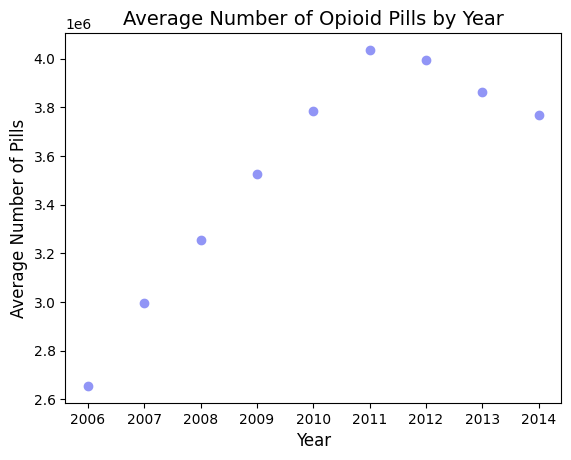

In [21]:
plt.scatter(average_pills_by_year['year'], average_pills_by_year['DOSAGE_UNIT'], color='#9195F6', marker='o')
plt.title('Average Number of Opioid Pills by Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Number of Pills', fontsize=12)

In [22]:
import rpy2
import rpy2.rinterface as ri
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
pandas2ri.activate()

In [23]:
ro.r.source("hw4.R")
pop_selected_r = ro.r['pop_selected']
pop_selected_pd = pandas2ri.rpy2py(pop_selected_r)
annual_NAs_r = ro.r['annual_NAs']
annual_NAs_pd = pandas2ri.rpy2py(annual_NAs_r)
annual_NAs_noPR_r = ro.r['annual_NAs_noPR']
annual_NAs_noPR_pd = pandas2ri.rpy2py(annual_NAs_noPR_r)
annual_AR_r = ro.r['annual_AR']
annual_AR_pd = pandas2ri.rpy2py(annual_AR_r)
land_area_r = ro.r['land_area']
land_area_pd = pandas2ri.rpy2py(land_area_r)
county_info_r = ro.r['county_info']
county_info_pd = pandas2ri.rpy2py(county_info_r)

New names:
• `` -> `...1`
Rows: 28265 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): BUYER_COUNTY, BUYER_STATE, countyfips, county_name, NAME, variable
dbl (5): ...1, STATE, COUNTY, year, population

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 27758 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): BUYER_COUNTY, BUYER_STATE, countyfips
dbl (4): ...1, year, count, DOSAGE_UNIT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 3198 Columns: 35
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): Areaname, STCOU, LND010190N1, LND0

In [24]:
pop_selected_pd.head(5)

,BUYER_COUNTY,BUYER_STATE,STATE,COUNTY,year,population
1,AUTAUGA,AL,1.0,1.0,2006.0,51328.0
2,BALDWIN,AL,1.0,3.0,2006.0,168121.0
3,BARBOUR,AL,1.0,5.0,2006.0,27861.0
4,BIBB,AL,1.0,7.0,2006.0,22099.0
5,BLOUNT,AL,1.0,9.0,2006.0,55485.0


In [25]:
print(type(pop_selected_pd))

<class 'pandas.core.frame.DataFrame'>


In [26]:
annual_NAs_pd.head(5)

,...1,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
1,188.0,ADJUNTAS,PR,2006.0,147.0,102800.0,None
2,189.0,ADJUNTAS,PR,2007.0,153.0,104800.0,None
3,190.0,ADJUNTAS,PR,2008.0,153.0,45400.0,None
4,191.0,ADJUNTAS,PR,2009.0,184.0,54200.0,None
5,192.0,ADJUNTAS,PR,2010.0,190.0,56200.0,None


In [27]:
annual_NAs_noPR_pd.head(5)

,...1,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
1,10072.0,GUAM,GU,2006.0,319.0,265348.0,None
2,10073.0,GUAM,GU,2007.0,330.0,275600.0,None
3,10074.0,GUAM,GU,2008.0,313.0,286900.0,None
4,10075.0,GUAM,GU,2009.0,390.0,355300.0,None
5,10076.0,GUAM,GU,2010.0,510.0,413800.0,None


In [28]:
annual_AR_pd.head(5)

,...1,BUYER_COUNTY,BUYER_STATE,year,count,DOSAGE_UNIT,countyfips
1,17430.0,MONTGOMERY,AR,2006.0,469.0,175390.0,05097
2,17431.0,MONTGOMERY,AR,2007.0,597.0,241270.0,05097
3,17432.0,MONTGOMERY,AR,2008.0,561.0,251760.0,05097
4,17433.0,MONTGOMERY,AR,2009.0,554.0,244160.0,05097
5,17434.0,MONTGOMERY,AR,2010.0,449.0,247990.0,05097


In [29]:
land_area_pd.head(5)

,Areaname,countyfips,LND110210D
1,UNITED STATES,00000,3531905.43
2,ALABAMA,01000,50645.33
3,"Autauga, AL",01001,594.44
4,"Baldwin, AL",01003,1589.78
5,"Barbour, AL",01005,884.88


In [30]:
county_info_pd.head(5)

,...1,BUYER_COUNTY,BUYER_STATE,countyfips,STATE,COUNTY,county_name,NAME,variable,year,population,Areaname,LND110210D
1,1.0,AUTAUGA,AL,01001,1.0,1.0,Autauga,"Autauga County, Alabama",B01003_001,2006.0,51328.0,"Autauga, AL",594.44
2,2.0,BALDWIN,AL,01003,1.0,3.0,Baldwin,"Baldwin County, Alabama",B01003_001,2006.0,168121.0,"Baldwin, AL",1589.78
3,3.0,BARBOUR,AL,01005,1.0,5.0,Barbour,"Barbour County, Alabama",B01003_001,2006.0,27861.0,"Barbour, AL",884.88
4,4.0,BIBB,AL,01007,1.0,7.0,Bibb,"Bibb County, Alabama",B01003_001,2006.0,22099.0,"Bibb, AL",622.58
5,5.0,BLOUNT,AL,01009,1.0,9.0,Blount,"Blount County, Alabama",B01003_001,2006.0,55485.0,"Blount, AL",644.78
